<a href="https://colab.research.google.com/github/ThiagoSViana/Projects/blob/main/FreeCode_MedicalData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading data from file
df = pd.read_csv("/content/drive/MyDrive/medical_examination.csv")

In [ ]:
# Adding 'overweight' column as interger
overweight = (df['weight']/((df['height']/100)**2)>25).astype(int)
df['overweight'] = overweight
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [ ]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
df.head()

#or...
#df["cholesterol"]=(df["cholesterol"]>1).astype(int)
#df["gluc"]=(df["gluc"]>1).astype(int)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,0,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [ ]:
#Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). \
#The dataset should be split by 'Cardio' so there is one chart for each cardio value.

df_catplot = df.melt(id_vars=['cardio'],value_vars=sorted(['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']))
df_catplot.head()

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


<Figure size 1440x360 with 0 Axes>

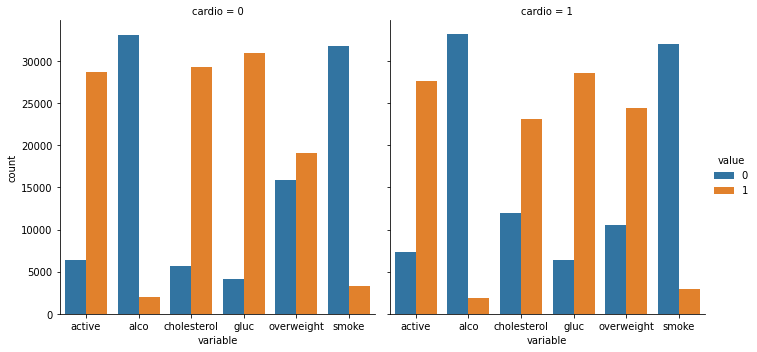

In [ ]:
#Counts of the categorical features 
count_feat = sns.catplot(data = df_catplot, kind = 'count', x = 'variable', hue = 'value',col = "cardio")

In [ ]:
#Clean the data. Filter out the following patient segments that represent incorrect data:
#diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
#height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
#height is more than the 97.5th percentile
#weight is less than the 2.5th percentile
#weight is more than the 97.5th percentile

df_filtered = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] \
              < df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] < df['weight'].quantile(0.975))]
df_filtered.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


##Continue from here (correlation matrix)

In [ ]:
# Calculatinf the correlation matrix
corr = df_filtered.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002871,0.003559,0.001012,0.000936,0.002896,0.001142,0.005861,0.002193,-0.001834,-0.000346,0.005777,0.003898,-0.000289
age,0.002871,1.000000,-0.016401,-0.076925,0.071650,0.021188,0.154586,0.154960,0.098468,-0.042193,-0.026728,-0.012165,0.240419,0.089587
sex,0.003559,-0.016401,1.000000,0.495375,0.121413,0.003478,0.059120,-0.038237,-0.023691,0.337618,0.166936,0.008771,0.003424,-0.051556
height,0.001012,-0.076925,0.495375,1.000000,0.240390,0.001840,0.014223,-0.066707,-0.030216,0.183578,0.084086,-0.003750,-0.023961,-0.147883
weight,0.000936,0.071650,0.121413,0.240390,1.000000,0.028190,0.226629,0.136298,0.091923,0.052085,0.056353,-0.013200,0.171317,0.661583
ap_hi,0.002896,0.021188,0.003478,0.001840,0.028190,1.000000,0.075537,0.023511,0.011358,-0.001696,0.001007,-0.000969,0.052045,0.020104
ap_lo,0.001142,0.154586,0.059120,0.014223,0.226629,0.075537,1.000000,0.153922,0.066621,0.023740,0.032205,0.002666,0.327413,0.172964
cholesterol,0.005861,0.154960,-0.038237,-0.066707,0.136298,0.023511,0.153922,1.000000,0.451896,0.005458,0.029719,0.007161,0.219502,0.123274
gluc,0.002193,0.098468,-0.023691,-0.030216,0.091923,0.011358,0.066621,0.451896,1.000000,-0.011395,0.004579,-0.007713,0.088093,0.074657
smoke,-0.001834,-0.042193,0.337618,0.183578,0.052085,-0.001696,0.023740,0.005458,-0.011395,1.000000,0.338451,0.026288,-0.020403,-0.002657


In [ ]:
#After consulting internet I found this solution (need to understand better*)
mask=np.triu(corr)
mask

array([[ 1.00000000e+00,  2.87074788e-03,  3.55855296e-03,
         1.01157209e-03,  9.36357592e-04,  2.89615789e-03,
         1.14187852e-03,  5.86071031e-03,  2.19298181e-03,
        -1.83392461e-03, -3.45819400e-04,  5.77722156e-03,
         3.89825279e-03],
       [ 0.00000000e+00,  1.00000000e+00, -1.64005038e-02,
        -7.69249069e-02,  7.16496984e-02,  2.11879295e-02,
         1.54586188e-01,  1.54959698e-01,  9.84680295e-02,
        -4.21927433e-02, -2.67283856e-02, -1.21650255e-02,
         2.40418656e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         4.95374942e-01,  1.21413357e-01,  3.47794427e-03,
         5.91201872e-02, -3.82366129e-02, -2.36905253e-02,
         3.37618411e-01,  1.66936317e-01,  8.77059984e-03,
         3.42397733e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  2.40390442e-01,  1.84013711e-03,
         1.42228395e-02, -6.67071489e-02, -3.02162982e-02,
         1.83578289e-01,  8.40861590e

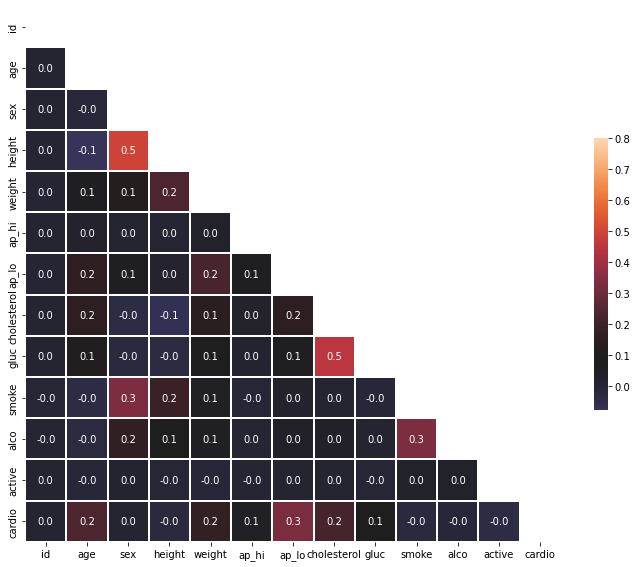

In [ ]:
#Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. 
fig = plt.subplots(figsize=(12, 10)) #changing the figure size
heatmap = sns.heatmap(
        corr, annot=True, fmt='.1f', linewidths=1, mask=mask, 
        vmax=.8, center=0.09, square=True, cbar_kws={'shrink':0.5})